# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as sts

# Import API key
from api_keys import weather_api_key as api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


609

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [3]:
import time 

In [4]:
# Tutor's help...

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key
# List of city data
city_data = []

#Print to logger
print("Beginning data retrieval        ")
print("--------------------------------")

# Create counter
record_count = 1
set_count = 1 

# Loop through all cities in list
for i, city in enumerate(cities):
    
    # Group cities in groups of 50
    if (i %50==0 and i!=0):
        set_count += 1 
        record_count = 0
        time.sleep(3)
    # Create endpoint for each city
    city_url = url+'&q='+city
    print('Processing Record %s of Set %s | %s' % (record_count, set_count, city))
    
    record_count += 1 
    
    # Run API request for each city
    response = requests.get(city_url)
    results = response.json()
    
    try:
        city_lat = results['coord']['lat']
        city_lng = results['coord']['lon']
        city_max_temp = results['main']['temp_max']
        city_humidity = results['main']['humidity']
        city_clouds = results['clouds']['all']
        city_wind = results['wind']['speed']
        city_country = results['sys']['country']
        city_date = results['dt']

        # Append city info into city_data list
        city_data.append({'City Name': city,
                          'Lat': city_lat,
                          'Lng': city_lng,
                         'Max Temp': city_max_temp,
                         'Humidity': city_humidity,
                         'Clouds': city_clouds,
                         'Wind': city_wind,
                         'Country': city_country,
                         'Date': city_date})


    except KeyError as e:
        print('City Not Found. Skipping......')
        pass 
    
print("--------------------------------")
print('Data Retrieval Complete         ')
print("--------------------------------")


Beginning data retrieval        
--------------------------------
Processing Record 1 of Set 1 | hilo
Processing Record 2 of Set 1 | tura
Processing Record 3 of Set 1 | mataura
Processing Record 4 of Set 1 | yellowknife
Processing Record 5 of Set 1 | atuona
Processing Record 6 of Set 1 | arraial do cabo
Processing Record 7 of Set 1 | cape town
Processing Record 8 of Set 1 | lorengau
Processing Record 9 of Set 1 | melfi
Processing Record 10 of Set 1 | mullaitivu
City Not Found. Skipping......
Processing Record 11 of Set 1 | tsihombe
City Not Found. Skipping......
Processing Record 12 of Set 1 | new norfolk
Processing Record 13 of Set 1 | malanje
Processing Record 14 of Set 1 | glenwood springs
Processing Record 15 of Set 1 | zaykovo
Processing Record 16 of Set 1 | raudeberg
Processing Record 17 of Set 1 | namatanai
Processing Record 18 of Set 1 | vestmanna
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | los llanos de aridane
Processing Record 21 of Set 1 | s

Processing Record 37 of Set 4 | coquimbo
Processing Record 38 of Set 4 | jamestown
Processing Record 39 of Set 4 | princeton
Processing Record 40 of Set 4 | tevaitoa
Processing Record 41 of Set 4 | maksatikha
Processing Record 42 of Set 4 | airai
Processing Record 43 of Set 4 | carnarvon
Processing Record 44 of Set 4 | saleaula
City Not Found. Skipping......
Processing Record 45 of Set 4 | saint-georges
Processing Record 46 of Set 4 | formoso do araguaia
City Not Found. Skipping......
Processing Record 47 of Set 4 | harij
Processing Record 48 of Set 4 | san cristobal
Processing Record 49 of Set 4 | hambantota
Processing Record 0 of Set 5 | taoudenni
Processing Record 1 of Set 5 | codrington
Processing Record 2 of Set 5 | le vauclin
Processing Record 3 of Set 5 | deputatskiy
Processing Record 4 of Set 5 | nicolas bravo
Processing Record 5 of Set 5 | norman wells
Processing Record 6 of Set 5 | iracoubo
Processing Record 7 of Set 5 | villaviciosa
Processing Record 8 of Set 5 | mahibadhoo


Processing Record 23 of Set 8 | najran
Processing Record 24 of Set 8 | namibe
Processing Record 25 of Set 8 | skalistyy
City Not Found. Skipping......
Processing Record 26 of Set 8 | kaeo
Processing Record 27 of Set 8 | sungaipenuh
Processing Record 28 of Set 8 | karakol
Processing Record 29 of Set 8 | atbasar
Processing Record 30 of Set 8 | maraa
Processing Record 31 of Set 8 | roald
Processing Record 32 of Set 8 | jacqueville
Processing Record 33 of Set 8 | teluk nibung
Processing Record 34 of Set 8 | caravelas
Processing Record 35 of Set 8 | rock springs
Processing Record 36 of Set 8 | naron
Processing Record 37 of Set 8 | kirakira
Processing Record 38 of Set 8 | vardo
Processing Record 39 of Set 8 | kokstad
Processing Record 40 of Set 8 | zhuanghe
Processing Record 41 of Set 8 | mahajanga
Processing Record 42 of Set 8 | flinders
Processing Record 43 of Set 8 | gari
Processing Record 44 of Set 8 | khani
Processing Record 45 of Set 8 | koch bihar
Processing Record 46 of Set 8 | terne

Processing Record 14 of Set 12 | remontnoye
Processing Record 15 of Set 12 | muros
Processing Record 16 of Set 12 | mendota
Processing Record 17 of Set 12 | bolungarvik
City Not Found. Skipping......
Processing Record 18 of Set 12 | duldurga
Processing Record 19 of Set 12 | tigzirt
Processing Record 20 of Set 12 | poum
Processing Record 21 of Set 12 | abidjan
Processing Record 22 of Set 12 | valley city
Processing Record 23 of Set 12 | honiara
Processing Record 24 of Set 12 | nowy targ
Processing Record 25 of Set 12 | monterey
Processing Record 26 of Set 12 | yulara
Processing Record 27 of Set 12 | louisbourg
City Not Found. Skipping......
Processing Record 28 of Set 12 | charters towers
Processing Record 29 of Set 12 | chapais
Processing Record 30 of Set 12 | chongwe
Processing Record 31 of Set 12 | makakilo city
Processing Record 32 of Set 12 | buariki
City Not Found. Skipping......
Processing Record 33 of Set 12 | savannah bight
Processing Record 34 of Set 12 | bhinga
Processing Rec

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
city_data_df = pd.DataFrame(city_data) 
city_data_df.to_csv('city_data_df.csv', index=False, header=True)
city_data_df
              

,City Name,Lat,Lng,Max Temp,Humidity,Clouds,Wind,Country,Date
0,hilo,19.7297,-155.0900,83.93,78,40,8.05,US,1628726909
1,tura,25.5198,90.2201,75.06,98,100,6.82,IN,1628726909
2,mataura,-46.1927,168.8643,57.47,82,100,6.08,NZ,1628726910
3,yellowknife,62.4560,-114.3525,56.80,47,100,11.21,CA,1628726910
4,atuona,-9.8000,-139.0333,77.74,67,28,17.76,PF,1628726911
...,...,...,...,...,...,...,...,...,...
559,yanam,16.7333,82.2167,81.73,70,98,5.26,IN,1628727010
560,choix,26.7092,-108.3219,89.94,56,80,3.56,MX,1628727171
561,olivenza,38.6832,-7.1030,83.21,47,0,4.18,ES,1628727172
562,zhezkazgan,47.8043,67.7144,63.37,55,18,11.61,KZ,1628727134


In [6]:
city_data_df.describe()

,Lat,Lng,Max Temp,Humidity,Clouds,Wind,Date
count,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,5.640000e+02
mean,19.861201,10.136276,69.616755,70.849291,54.586879,7.957270,1.628727e+09
std,32.905825,89.725987,14.099510,20.993875,38.216564,5.345327,9.719376e+01
min,-54.800000,-179.166700,33.550000,11.000000,0.000000,0.000000,1.628727e+09
25%,-5.224175,-65.453150,58.350000,59.000000,16.500000,3.775000,1.628727e+09
50%,22.525000,15.058350,71.240000,76.000000,62.500000,6.910000,1.628727e+09
75%,47.104200,81.995925,80.142500,87.000000,93.000000,11.352500,1.628727e+09
max,78.218600,179.316700,107.310000,100.000000,100.000000,29.300000,1.628727e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#  Get the indices of cities that have humidity over 100%.


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

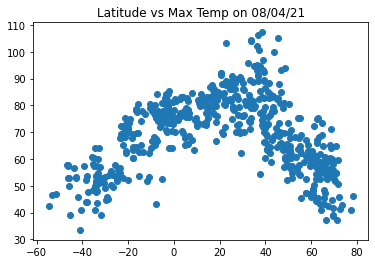

In [9]:
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'])
plt.title('Latitude vs Max Temp on 08/04/21')
plt.show()

## Latitude vs. Humidity Plot

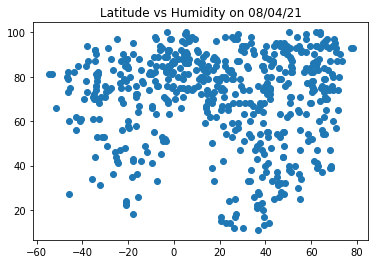

In [10]:
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'])
plt.title('Latitude vs Humidity on 08/04/21')
plt.show()

## Latitude vs. Cloudiness Plot

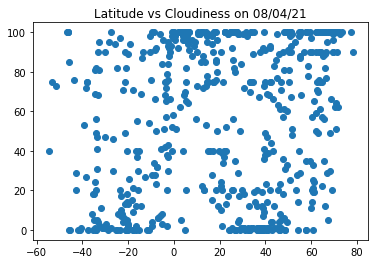

In [11]:
plt.scatter(city_data_df['Lat'], city_data_df['Clouds'])
plt.title('Latitude vs Cloudiness on 08/04/21')
plt.show()

## Latitude vs. Wind Speed Plot

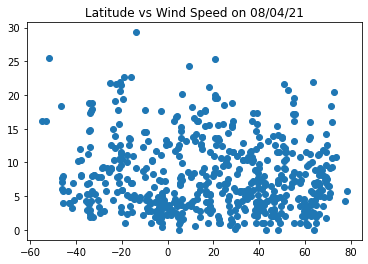

In [12]:
plt.scatter(city_data_df['Lat'], city_data_df['Wind'])
plt.title('Latitude vs Wind Speed on 08/04/21')
plt.show()

## Linear Regression

In [22]:
north = city_data_df['Lat']>0
south = city_data_df['Lat']<0
north_hemi = city_data_df.loc[north]
south_hemi = city_data_df.loc[south]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

FileNotFoundError: [Errno 2] No such file or directory: 'Max Temp vs Latitude in Northern Hemisphere 08/06/21.png'

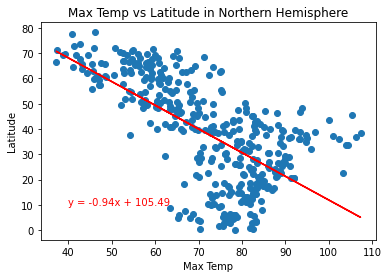

In [23]:
x_values = north_hemi['Max Temp']
y_values = north_hemi['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=10,color="red")
plt.title('Max Temp vs Latitude in Northern Hemisphere')
plt.xlabel('Max Temp')
plt.ylabel('Latitude')
plt.savefig('Max Temp vs Latitude in Northern Hemisphere 08/06/21.png')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

FileNotFoundError: [Errno 2] No such file or directory: 'Max Temp vs Latitude in Southern Hemisphere 08/06/21.png'

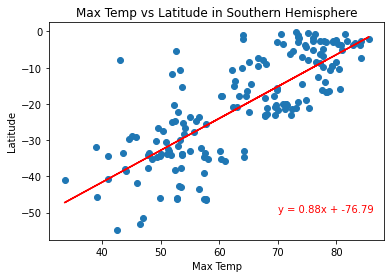

In [15]:
x_values = south_hemi['Max Temp']
y_values = south_hemi['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(70,-50),fontsize=10,color="red")
plt.title('Max Temp vs Latitude in Southern Hemisphere')
plt.xlabel('Max Temp')
plt.ylabel('Latitude')
plt.savefig('Max Temp vs Latitude in Southern Hemisphere 08/06/21.png')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

FileNotFoundError: [Errno 2] No such file or directory: 'Humidity vs Latitude in Northern Hemisphere 08/06/21.png'

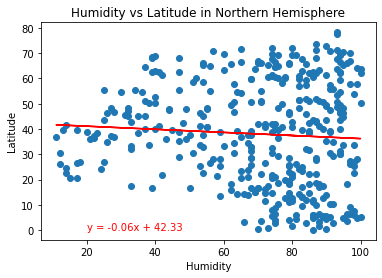

In [16]:
x_values = north_hemi['Humidity']
y_values = north_hemi['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,0),fontsize=10,color="red")
plt.title('Humidity vs Latitude in Northern Hemisphere')
plt.xlabel('Humidity')
plt.ylabel('Latitude')
plt.savefig('Humidity vs Latitude in Northern Hemisphere 08/06/21.png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

FileNotFoundError: [Errno 2] No such file or directory: 'Humidity vs Latitude in Southern Hemisphere 08/06/21.png'

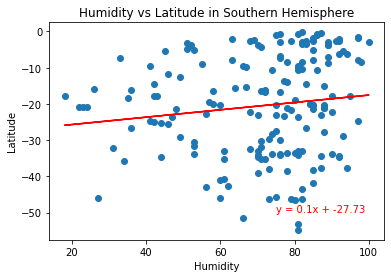

In [17]:
x_values = south_hemi['Humidity']
y_values = south_hemi['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(75,-50),fontsize=10,color="red")
plt.title('Humidity vs Latitude in Southern Hemisphere')
plt.xlabel('Humidity')
plt.ylabel('Latitude')
plt.savefig('Humidity vs Latitude in Southern Hemisphere 08/06/21.png')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

FileNotFoundError: [Errno 2] No such file or directory: 'Cloudiness vs Latitude in Northern Hemisphere 08/06/21.png'

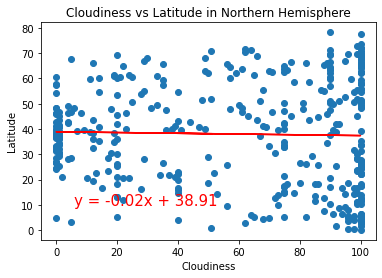

In [18]:
x_values = north_hemi['Clouds']
y_values = north_hemi['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Cloudiness vs Latitude in Northern Hemisphere')
plt.xlabel('Cloudiness')
plt.ylabel('Latitude')
plt.savefig('Cloudiness vs Latitude in Northern Hemisphere 08/06/21.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

FileNotFoundError: [Errno 2] No such file or directory: 'Cloudiness vs Latitude in Southern Hemisphere 08/06/21.png'

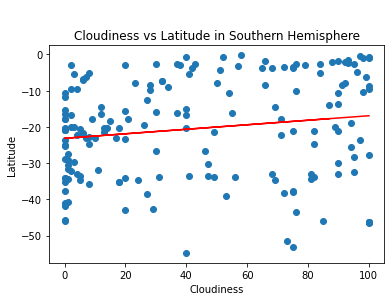

In [19]:
x_values = south_hemi['Clouds']
y_values = south_hemi['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Cloudiness vs Latitude in Southern Hemisphere')
plt.xlabel('Cloudiness')
plt.ylabel('Latitude')
plt.savefig('Cloudiness vs Latitude in Southern Hemisphere 08/06/21.png')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

FileNotFoundError: [Errno 2] No such file or directory: 'Wind Speed vs Latitude in Southern Hemisphere 08/06/21.png'

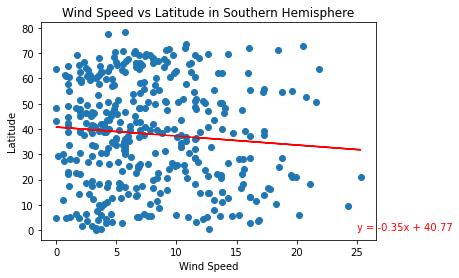

In [20]:
x_values = north_hemi['Wind']
y_values = north_hemi['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(25,0),fontsize=10,color="red")
plt.title('Wind Speed vs Latitude in Southern Hemisphere')
plt.xlabel('Wind Speed')
plt.ylabel('Latitude')
plt.savefig('Wind Speed vs Latitude in Northern Hemisphere 08/06/21.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

FileNotFoundError: [Errno 2] No such file or directory: 'Wind Speed vs Latitude in Southern Hemisphere 08/06/21.png'

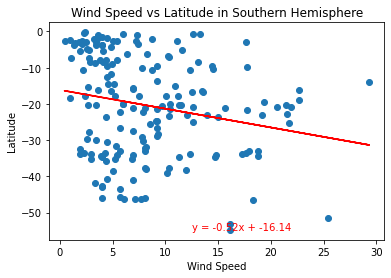

In [21]:
x_values = south_hemi['Wind']
y_values = south_hemi['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(12.5,-55),fontsize=10,color="red")
plt.title('Wind Speed vs Latitude in Southern Hemisphere')
plt.xlabel('Wind Speed')
plt.ylabel('Latitude')
plt.savefig('Wind Speed vs Latitude in Southern Hemisphere 08/06/21.png')
plt.show()